# Metropolis Hastings

## Algorithm

The Metropolis-Hastings algorithm is a general term for a family of Markov chain simulation methods that are useful for sampling from Bayesian posterior distributions. MHA, can be considered as a generalisation of the Metropolis algorithm for **Non Symmetric Jump Distributions**.

Both Gibbs sampling and Metropolic Algorithm are special cases of Metropolis Hastings Algorithm.

The Metropolis-Hastings algorithm generalizes the basic Metropolis algorithm presented above in two ways. 
1. The jumping rules $J_t$ need no longer be symmetric; that is, there is no requirement that 
$J_t(\theta_a|\theta_b) ≡ J_t(\theta_b|\theta_a)$. 
2. To correct for the asymmetry in the jumping rule, the ratio r for acceptance probability is replaced by a ratio of ratios:

$$
r = \frac{p(\theta^{*}|y)/J_t(\theta^{*}|\theta^{t-1})}{p(\theta^{t-1}|y)/J_t(\theta^{t-1}|\theta^{*})}
$$

This leads to a stationary distribution for the target pdf


## MCMC Sampling Efficiency:-

To check the efficiency of the MCMC algorithms, we will use a simple test. 

We will sample from $p(\theta) = exp(-|\theta|)$, the laplace distribution using an normal jump distribution. (Should ideally use log_funtions)


In [30]:
# Metropolis sampling (symmetric proposal) for given log-target distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random
sns.set_style('whitegrid')

# Single dimension Metroplis Hastings
def Mhsample(theta0, targetf, jumpf, n = 1000 ):
    # xs = np.zeros(n); ys = np.zeros(n)
    theta = np.zeros(n)
    theta_current = theta0
    acc = 0
    for i in range(n):
        jump = jumpf(theta_current)
        theta_star = theta_current + jump

        r = targetf(theta_star)/targetf(theta_current) 
        if r>1:
            theta_current = theta_star; acc += 1
        else:
            flip = random.uniform()
            if flip < r:
                theta_current = theta_star; acc+=1
            else:
                theta_current = theta_current
        theta[i] = theta_current
    return theta, acc/n

def laplace_targetf(x):
    return np.exp(-np.abs(x))/2

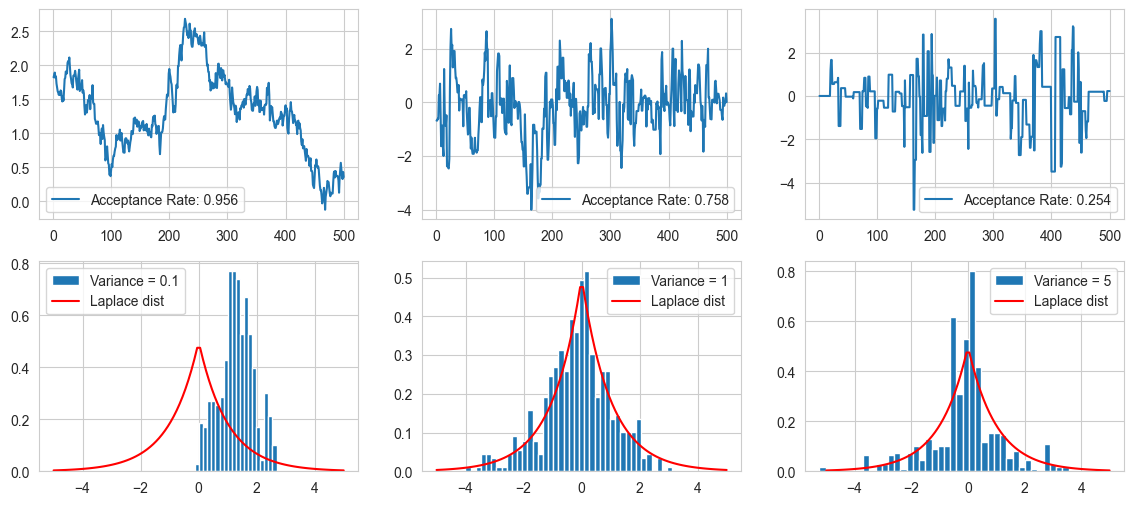

In [31]:
# Plotting the values of theta
random.seed(100)
n = 500

x = np.linspace(1,n,n)
fig, ax = plt.subplots(2,3, figsize = (14,6))

def jumpf0(theta):
    return random.normal(loc = 0.0, scale = 0.1)
theta , accept_rate = Mhsample(2, laplace_targetf, jumpf0, n = n)
ax[0][0].plot(x, theta, label = f"Acceptance Rate: {accept_rate}"); ax[0][0].legend()
ax[1][0].hist(theta, bins = 20, density=True, label = "Variance = 0.1")
y = np.linspace(-5,5,100)
ax[1][0].plot(y, laplace_targetf(y), 'r', label = "Laplace dist"); ax[1][0].legend()

def jumpf1(theta):
    return random.normal(loc = 0.0, scale = 1)
theta , accept_rate = Mhsample(2, laplace_targetf, jumpf1, n = n)
ax[0][1].plot(x, theta , label = f"Acceptance Rate: {accept_rate}"); ax[0][1].legend()
ax[1][1].hist(theta, bins = 40, density=True, label = "Variance = 1")
y = np.linspace(-5,5,100)
ax[1][1].plot(y, laplace_targetf(y), 'r', label = "Laplace dist"); ax[1][1].legend()

def jumpf2(theta):
    return random.normal(loc = 0.0, scale = 5)
theta , accept_rate = Mhsample(0, laplace_targetf, jumpf2, n = n)
ax[0][2].plot(x, theta , label = f"Acceptance Rate: {accept_rate}"); ax[0][2].legend()
ax[1][2].hist(theta, bins = 40, density=True, label = "Variance = 5")
y = np.linspace(-5,5,100)
ax[1][2].plot(y, laplace_targetf(y), 'r', label = "Laplace dist"); ax[1][2].legend()

plt.show()

Some inferences made from the plots:-
1. For low value of variance (0.1), there is a high acceptance ratio as the values are close by, but the chain resembles a random walk, as it does not go to far from its chain values leading to a highly biased output
2. For intermediate variance (1), the final histogram resemebles the target fuction well, and the mont carlo walk travels well around the distribution.
3. For large value of variance (5), there is a low acceptance rate, and long sequence of identical values, seen as spikes in the curve. The final histogram does not resemble the target very well.

A thing to note is that if we run the sampling for long enough, the samples will eventually collapse to the target (but impractical).

The jump distribution (proposal) is usually tuned with a scalar parameter that determines the step length, monitoring the acceptance rate. 

The **optimal acceptance rate** for Metropolis-Hastings for unimodal targets is quite low: ranging from **50% (low dimensional) down to 23% (high dimensional)**. These have been derived for sampling a multivariate normal distribution target, but can be expected to generalise to other unimodal distributions. High acceptance usually indicates too short steps, low acceptance indicates too long steps.

It should be noted that sampling Multimodal targets is not very efficient with MCMC methods, and acceptance is not a good criteria to judge the sampling run.


## MCMC Convergence

We have already seen the proof for convergence of Metropolis Algorithm, the proof for MH is also similar. It should be noted that the proof is for **asymptotic** convergence, and it is difficult to say about convergence after some finite steps. 

While essentially any reasonable proposal is enough to guarantee asymptotic convergence, the convergence speeds depends strongly on the specific proposal used, thus it is important to tune the proposal for the problem at hand.

It is in general impossible to prove that a MCMC chain has converged, but we have lots of checks to detect if it has not converged. The most simple way is to to check the **Gelman Rubin Factor**, in which we start with m different starting points for m chains and check if they produce the same result by calculating the within chain variance and between chain varince.

The estimate of $\hat{R}$ is based on the within-chain variance $W$ and between-chains variance $B$.

$$
W = \frac{1}{m} \sum_{j = 1}^{m} s_j^2, \; where \; s_j^2 = \frac{1}{n-1} \sum_{i = 1}^{n} (\theta_{i,j}- \bar{\theta_j})
$$

$$
B = \frac{n}{m-1} \sum_{j = 1}^{m} (\theta_j - \theta), \; where \; \theta_j = \frac{1}{n} \sum_{i = 1}^{n} \theta_{i,j}, \; \; \theta = \frac{1}{m} \sum_{j = 1}^{m} \theta_{j} 
$$

Using these, we can estimate the Var in $\theta$, as well as the GR metric

$$
\hat{R} = \sqrt{\frac{Var(\theta)}{W}}, \; Var(\theta) = \frac{n-1}{n} W + \frac{1}{n} B  
$$

$\hat{R}$ approaches 1 as n increases. The threshold of 1.1 is commonly used to consider a chain as having converged. Note that here $\hat{R}$, has been defined for a single dimensional case, for multiple parameters, we calculate individual metrics, and take the maximum.

In [32]:
# Calculating the Gellman Rubin Metric for our example case:-
# For variance (0.1), (1), (5), starting at different starting points

import functools 

def jumpf0(theta, scale):
    return random.normal(loc = 0.0, scale = scale)

random.seed(100)
n = 500
x = np.linspace(1,n,n)
var = [0.1, 1, 5]

for i, v in enumerate(var):
    jumpf = functools.partial(jumpf0, scale = v)
    Mhsample = functools.partial(Mhsample, targetf = laplace_targetf, jumpf = jumpf, n = n)
    theta1, _ = Mhsample(-1); theta2, _ = Mhsample(0)
    theta3, _ = Mhsample(2); theta4, _ = Mhsample(3) 
    theta5, _ = Mhsample(4); theta6, _ = Mhsample(5)

    theta = np.vstack((theta1, theta2, theta3, theta4, theta5, theta6))
    theta_mean = np.mean(theta, axis = 1); theta_var = np.var(theta, axis = 1)
    B = n*np.var(theta_mean, axis = 0); W = np.mean(theta_var, axis = 0)
    var = (n-1)/n*W + B/n; R = np.sqrt(var/W)
    print(f"For chain of jump varaince {v}, the GR metric value is = {R}")


For chain of jump varaince 0.1, the GR metric value is = 3.1473189456462185
For chain of jump varaince 1, the GR metric value is = 1.0076008174044913
For chain of jump varaince 5, the GR metric value is = 1.0018350696182325


Hense, here we can see the metric is far from 1 for var 0.1, but close to 1 for var = 5, which is not a good jump var, but the GR metric only checks the between and in chain variances, hense **only convergence** but not the quality of convergence, or sampling efficiency.

## MCMC Sampling Efficiency

The efficiency of MCMC samplers is typically evaluated using autocorrelations of the samples, which measure the correlation of neighbouring samples after a given lag $k$.

The motivation for using autocorrelation is that an optimally efficient sampler would typically produce essentially uncorrelated samples while for an inefficient sampler that makes very small steps, nearby samples would be very highly correlated.

Autocorrelation $\rho_k$ of a wide enough stationary series $\theta_1, \theta_2, ...$ for lag k is:

$$
\rho_k = \frac{\mathbb{E}[(\theta_i - \mu)(\theta_{i+k} - \mu)]}{\sigma^2}, \; \; k = 0,1,2
$$

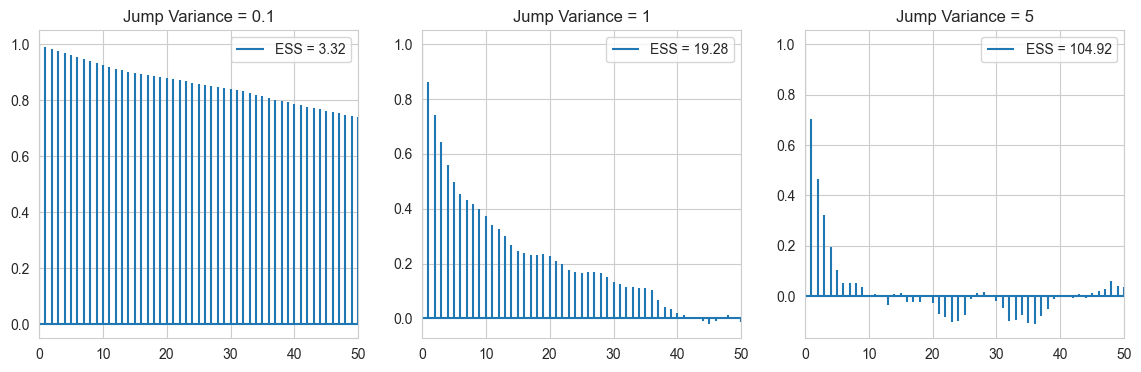

In [33]:
# Making plots of autocorrelation for different jump variances
fig, ax = plt.subplots(1,3, figsize = (14,4))

var = [0.1, 1, 5]
random.seed(100)
kmax = 50
for i, v in enumerate(var):
    jumpf = functools.partial(jumpf0, scale = v)
    Mhsample = functools.partial(Mhsample, targetf = laplace_targetf, jumpf = jumpf, n = n)
    Sample = Mhsample(-1)[0]
    corrsum = np.correlate(Sample, Sample, mode = 'full')[n-1:]
    corrsum = corrsum/np.var(Sample)/n
    ESS = n/(1+2*np.sum(corrsum[:kmax-1]))
    ax[i].acorr(Sample, maxlags = 50, label = f"ESS = {ESS:.2f}"); ax[i].legend()
    ax[i].set_xlim(0,50)
    ax[i].set_title(f"Jump Variance = {v}")


As expected, the jump variance 0.1 chain is very highly correlated, due to low variance, and random walk nature. As we increase the variance the autocorrelation plot dies out more and more quickly.

Autocorrelations can be conveniently summarised using the effective sample size (ESS), which is a measure of how many independent samples a given sample is worth.

$$
ESS = \frac{M}{(1+2 \sum_{k = 1}^{M} \rho_k)}
$$

Uncorrelated Samples give an ESS = M, meaning out of M samples, all are worth it. Here we see an increasing value of ESS, with increase in variance. (Note var = 5 has good $\hat{R}$, and ESS but its sample still does not converge well to the target, as it has a low acceptance rate, and it does not explore the local region well)

## MCMC for Multimodal distributions

We have examined a basic implementation of MCMC for unimodal distributions, but Sampling multimodal distributions with MCMC is harder as a successful sampler would need to combine small-scale local exploration with large global jumps between different modes, which are usually incompatible goals.

One clever way to sample Multimodal distributions is **Parallel Tempering**
The philosophy is to run multiple chains in parallel of different temperatures (more on this), with states swapping between chains. 

Inplace of sampling $\pi(\theta)$, we sample out $\pi(\theta)^{\beta}$ (or $p(\theta)p(D|\theta^{\beta})$ for bayesian models), and the beta from 0 to 1, is the temperature. The 0 temp is labelled hot, and the pdf, is mostly flat, while the 1 temp is labelled cold and it has the multimodal distribution.

The basic idea is that we sample out from all the chain, and we can swap the states form hotter chain to the next coller chain based on a ration of pdfs. The hotter chain is mostly flat so it scans the sample well while the colder chains are more foccused on the modes, hense this transfer of states from hotter to cooler helps our cause of multi modal sampling.

Mathematically, $\beta = 1/T$, is inverse to temperature. Given a set of temperature values $B = (\beta_1 = 1, ... \beta_b = 0 )$, we define an agumented system of chains

$$
\theta = (\theta^{(1)}, \theta^{(2)}, ... \theta^{(b)} )
$$

The algorithm proceeds in a sample and swap fashion, we sample the chains starting from the hottest, and then check its swapability with the next cooler one unit we reach the coolest. Then we repeat this iteration many time
1. Standard MH proposals for $i^{th}$ state $\pi_{\beta_i}(\theta^{(i)})$  with 

$$ 
r = \frac{\pi(\theta^{*}|y)/J_t(\theta^{*}|\theta^{t-1})}{\pi(\theta^{t-1}|y)/J_t(\theta^{t-1}|\theta^{*})}
$$

2. A proposal to swap $i^{th}$ and $(i+1)^{th}$ states with (new/old):

$$ 
r = \frac{\pi_{\beta_{i}}(\theta^{i+1})\pi_{\beta_{i+1}}(\theta^{i})}{\pi_{\beta_{i}}(\theta^{i})\pi_{\beta_{i+1}}(\theta^{i+1})}
$$


### Parallel Tempring Example

We will use an example to test out parllel tempering MCMC, for multimodal target.

$$
\pi(\theta) = exp(-\gamma(\theta^2 - 1)^2)
$$

with $\gamma = 64$, we will get a sharply peaked multimodal distribution at $\theta = \pm 1$


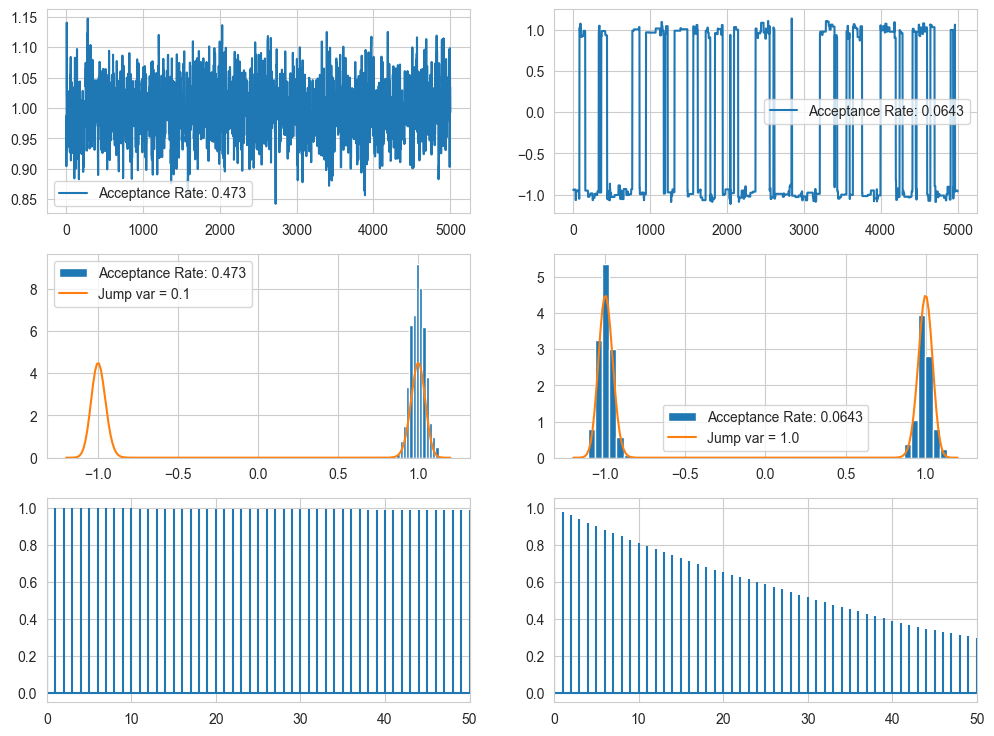

In [34]:
# Will evaluate the integral for normalisation using scipy.integrate.quad
import scipy.integrate
random.seed(42)
 
# log-target distribution 
def ltarget(theta, gamma):
    return -gamma*(theta**2-1)**2
 
# Find the normaliser constant for the target distribution
Z = scipy.integrate.quad(lambda theta: np.exp(ltarget(theta, 64.0)), -2, 2)

def log_MHsample(theta0, n, logtarget, drawproposal):
    theta = theta0
    thetas = np.zeros(n)
    accepts = 0
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(random.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
        thetas[i] = theta
    return thetas, accepts/n

# Plotting the values of samples
fig, ax = plt.subplots(3,2 , figsize = (12,9))

theta, accr = log_MHsample(1.0, 10000, lambda theta: ltarget(theta, 64.0),
                                 lambda theta: theta + 0.1*random.normal())
theta = theta[len(theta)//2:]
x = np.linspace(1, len(theta), len(theta))
ax[0][0].plot(x, theta, label = f"Acceptance Rate: {accr}"); ax[0][0].legend()
ax[1][0].hist(theta, bins = 15, density=True, label = f"Acceptance Rate: {accr}")
t = np.linspace(-1.2, 1.2, 200)
ax[1][0].plot(t, np.exp(ltarget(t, 64.0)) / Z[0], label = "Jump var = 0.1"); ax[1][0].legend()
ax[2,0].acorr(theta, maxlags = 50); ax[2,0].set_xlim(0,50)

theta, accr = log_MHsample(1.0, 10000, lambda theta: ltarget(theta, 64.0),
                                 lambda theta: theta + 1.0*random.normal())
theta = theta[len(theta)//2:]
x = np.linspace(1, len(theta), len(theta))
ax[0][1].plot(x, theta, label = f"Acceptance Rate: {accr}"); ax[0][1].legend()
ax[1][1].hist(theta, bins = 50, density=True, label = f"Acceptance Rate: {accr}")
ax[1][1].plot(t, np.exp(ltarget(t, 64.0)) / Z[0], label = "Jump var = 1.0"); ax[1][1].legend()
ax[2,1].acorr(theta, maxlags = 50); ax[2,1].set_xlim(0,50)

plt.show()

As you can see, for small variance, the model scans one mode well but not the other, but for higher var, the model does go to the other mode, but the problem is that it spends some time on one, then move to next, then spends some time here, then moves, ie it is not jumping from mode to mode based on its pdf. (Some issue with the autocorr)

In [9]:
betas = np.logspace(-3, 0, 5)
print("The five betas are: ",betas)

The five betas are:  [0.001      0.00562341 0.03162278 0.17782794 1.        ]


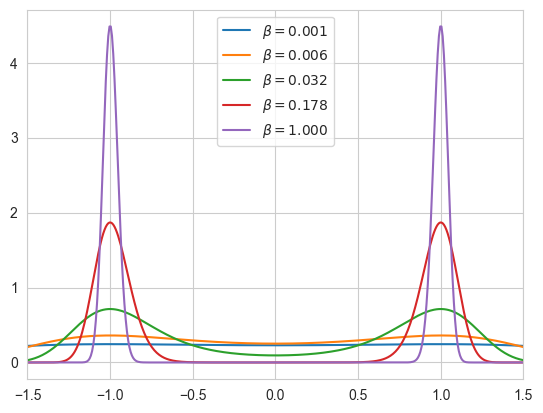

In [10]:
import scipy.integrate
 
def ltarget(theta, gamma):
    return -gamma*(theta**2-1)**2

# Plotting the values of samples
t = np.linspace(-1.5, 1.5, 400)
for b in betas:
    Z = scipy.integrate.quad(lambda theta: np.exp(b * ltarget(theta, 64.0)), -4, 4)
    plt.plot(t, np.exp(b * ltarget(t, 64.0)) / Z[0], label=r"""$\beta = %.3f$""" % b)
plt.xlim(-1.5, 1.5)
plt.legend()
plt.show()

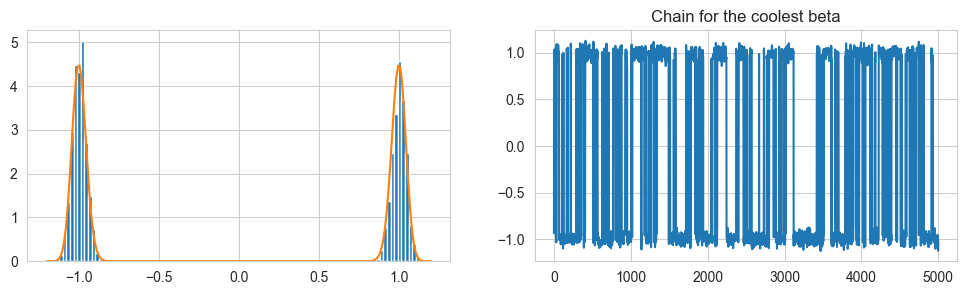

Acceptance rates: [0.4698 0.637  0.5694 0.4845 0.4563]
Swap acceptance rates: [0.74561404 0.63706096 0.4660707  0.4945184 ]


In [28]:
def pt_target(theta, beta, gamma):
    return beta * ltarget(theta, gamma)
 
def pt_msample(theta0, n, betas, target, drawproposal):
    CHAINS = len(betas)
    accepts = np.zeros(CHAINS)
    swapaccepts = np.zeros(CHAINS-1)
    swaps = np.zeros(CHAINS-1)
    # All variables are duplicated for all the chains
    theta = theta0 * np.ones(CHAINS)
    lp = np.zeros(CHAINS)
    thetas = np.zeros((n, CHAINS))
    for j in range(CHAINS):
        lp[j] = target(theta[j], betas[j])
    for i in range(n):
        # Independent moves for every chain, MH acceptance
        for j in range(CHAINS):
            theta_prop = drawproposal(theta[j], betas[j])
            l_prop = target(theta_prop, betas[j])
            if np.log(random.rand()) < l_prop - lp[j]:
                theta[j] = theta_prop
                lp[j] = l_prop
                accepts[j] += 1
        # Swap move for two chains, MH acceptance:
        j = random.randint(CHAINS-1)
        h = target(theta[j+1],betas[j])+target(theta[j],betas[j+1]) - lp[j] - lp[j+1]
        swaps[j] += 1
        if np.log(random.rand()) < h:
            # Swap theta[j] and theta[j+1]
            temp = theta[j]
            theta[j] = theta[j+1]
            theta[j+1] = temp
            lp[j] = target(theta[j], betas[j])
            lp[j+1] = target(theta[j+1], betas[j+1])
            swapaccepts[j] += 1
        thetas[i,:] = theta
    return thetas, accepts/n, swapaccepts/swaps
 
random.seed(42)
betas = np.logspace(-3, 0, 5)
theta, accn, swapn = pt_msample(1.0, 10000, betas,
                   lambda theta, beta: pt_target(theta, beta, 64.0),
                   lambda theta, beta: theta + 0.1/np.sqrt(beta)*random.normal())

fig, ax = plt.subplots(1,2, figsize = (12,3))
theta = theta[len(theta)//2:]
ax[0].hist(theta[:,-1], 100, density=True)
t = np.linspace(-1.2, 1.2, 200)
ax[0].plot(t, np.exp(ltarget(t, 64.0)) / Z[0])

ax[1].set_title("Chain for the coolest beta")
ax[1].plot(theta[:,-1])
plt.show()

print('Acceptance rates:', accn)
print('Swap acceptance rates:', swapn)

The acceptance rate for the chains is in the desired region, and the coolest chain does scan one mode then jump then scan then jump, but now it is much more accustomed to the pdf.

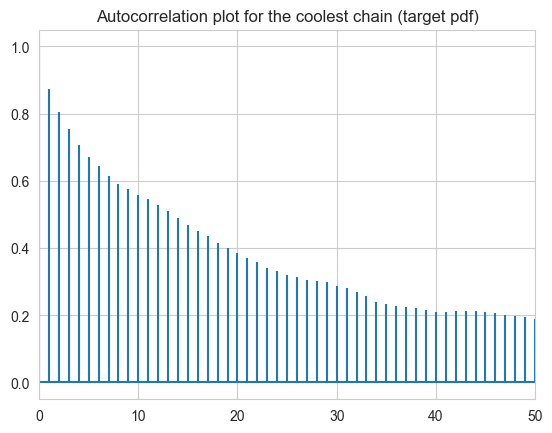

In [29]:
fig, ax = plt.subplots()
ax.set_title("Autocorrelation plot for the coolest chain (target pdf)")
ax.acorr(theta[:,-1], maxlags = 50); ax.set_xlim(0,50)
plt.show()